# 6.6 Time-Series Data Analysis

### This script contains the following:

#### 1. Importing your libraries and data
#### 2. Subsetting, wrangling, and cleaning time-series data
#### 3. Time series analysis: decomposition
#### 4. Testing for stationarity
#### 5. Stationarizing the Department of Transportion Trip Distance data

## 1. Importing your libraries and data

In [1]:
# quandl not imported as DOT trip data already has time series data

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm 
import os
import warnings

warnings.filterwarnings("ignore") 

plt.style.use('fivethirtyeight') 

In [2]:
# Define Path

path=r'C:\Users\dell\Desktop\Career Foundry\6.0 Immersion - Project Folder'

In [3]:
# Import data set df_trips_clean.pkl

df_trips_clean=pd.read_pickle(os.path.join(path,'02 Data','Prepared Data','df_trips_clean.pkl'))

In [14]:
for f in os.listdir("/Users/dell/Desktop/Career Foundry/6.0 Immersion - Project Folder/"):
 print(f)

01 Project Management
02 Data
03 Scripts
04 Sent to client
05 Visualizations


In [ ]:
for f in os.listdir("/home/james/python_error/docs/"):

In [4]:
df_trips_clean.head(5)

,Level,Date,State FIPS,State Postal Code,County FIPS,County Name,Population Staying at Home,Population Not Staying at Home,Number of Trips,Number of Trips <1,...,Number of Trips 5-10,Number of Trips 10-25,Number of Trips 25-50,Number of Trips 50-100,Number of Trips 100-250,Number of Trips 250-500,Number of Trips >=500,Row ID,Week,Month
0,National,2019/01/01,NaN,NaN,NaN,NaN,77433867.0,248733553.0,8.977844e+08,241667151.0,...,129670778.0,116904343.0,40432062.0,15686639.0,7525563.0,1806022.0,1728112.0,00-00000-20190101,0,1
1,National,2019/01/02,NaN,NaN,NaN,NaN,61305201.0,264862219.0,1.139452e+09,291276735.0,...,171637514.0,167412698.0,56148976.0,17739183.0,7817044.0,1962301.0,1531219.0,00-00000-20190102,0,1
2,National,2019/01/03,NaN,NaN,NaN,NaN,63050480.0,263116940.0,1.162753e+09,296375014.0,...,175775410.0,172027487.0,57632422.0,18366626.0,8124548.0,2038099.0,1567072.0,00-00000-20190103,0,1
3,National,2019/01/04,NaN,NaN,NaN,NaN,61803652.0,264363768.0,1.181954e+09,293159631.0,...,181324645.0,176144493.0,58761592.0,19315785.0,8687318.0,2096065.0,1569185.0,00-00000-20190104,0,1
4,National,2019/01/05,NaN,NaN,NaN,NaN,64389745.0,261777675.0,1.180477e+09,295459014.0,...,180941769.0,165239790.0,54842134.0,19363939.0,8490791.0,1991159.0,1438664.0,00-00000-20190105,0,1


In [5]:
df_trips_clean.shape

(4828232, 22)

In [6]:
df_trips_clean.columns

Index(['Level', 'Date', 'State FIPS', 'State Postal Code', 'County FIPS',
       'County Name', 'Population Staying at Home',
       'Population Not Staying at Home', 'Number of Trips',
       'Number of Trips <1', 'Number of Trips 1-3', 'Number of Trips 3-5',
       'Number of Trips 5-10', 'Number of Trips 10-25',
       'Number of Trips 25-50', 'Number of Trips 50-100',
       'Number of Trips 100-250', 'Number of Trips 250-500',
       'Number of Trips >=500', 'Row ID', 'Week', 'Month'],
      dtype='object')

In [7]:
type(df_trips_clean)

pandas.core.frame.DataFrame

## 2. Subsetting, wrangling, and cleaning time-series data

In [8]:
#Creating dataframe for subset using only national data
df_nation=df_trips_clean[df_trips_clean['Level'] =='National']

In [9]:
#Create dataframe to focus on total Number of Trips for analysis
df_nat_trips=df_nation[['Date','Number of Trips']]

In [10]:
#Smooth daily trip values to 90 day average
df_nat_trips['trip_quarterly_avg'] = df_nat_trips['Number of Trips'].rolling(90).mean()

In [11]:
df_nat_trip_avg = df_nat_trips[~df_nat_trips['trip_quarterly_avg'].isna()]

In [12]:
#Create dataframe to focus on quarterly trip average
df_nat_trip_avg=df_nat_trip_avg[['Date','trip_quarterly_avg']]

In [13]:
# Set the "Date" column as the index

from datetime import datetime

df_nat_trip_avg['datetime'] = pd.to_datetime(df_nat_trip_avg['Date']) # Create a datetime column from "Date.""
df_nat_trip_avg = df_nat_trip_avg.set_index('datetime') # Set the datetime as the index of the dataframe.
df_nat_trip_avg.drop(['Date'], axis=1, inplace=True) # Drop the "Date" column.
df_nat_trip_avg.head()

,trip_quarterly_avg
datetime,
2019-03-31,1.199074e+09
2019-04-01,1.204852e+09
2019-04-02,1.207999e+09
2019-04-03,1.211548e+09
2019-04-04,1.215043e+09


In [14]:
df_nat_trip_avg.tail(25)

,trip_quarterly_avg
datetime,
2023-01-25,1.386100e+09
2023-01-26,1.386276e+09
2023-01-27,1.386244e+09
2023-01-28,1.387559e+09
2023-02-19,1.386473e+09
2023-02-20,1.386309e+09
2023-02-21,1.387644e+09
2023-02-22,1.389303e+09
2023-02-23,1.390647e+09


In [15]:
df_nat_trip_avg = df_nat_trip_avg.sort_values(by='datetime')
print(df_nat_trip_avg)

            trip_quarterly_avg
datetime                      
2019-03-31        1.199074e+09
2019-04-01        1.204852e+09
2019-04-02        1.207999e+09
2019-04-03        1.211548e+09
2019-04-04        1.215043e+09
...                        ...
2023-02-28        1.405593e+09
2023-03-01        1.406625e+09
2023-03-02        1.408159e+09
2023-03-03        1.407798e+09
2023-03-04        1.410244e+09

[1435 rows x 1 columns]


In [16]:
df_nat_trip_avg.tail(25)

,trip_quarterly_avg
datetime,
2023-02-08,1.378728e+09
2023-02-09,1.380371e+09
2023-02-10,1.381835e+09
2023-02-11,1.383543e+09
2023-02-12,1.394312e+09
2023-02-13,1.394364e+09
2023-02-14,1.395497e+09
2023-02-15,1.397160e+09
2023-02-16,1.397592e+09


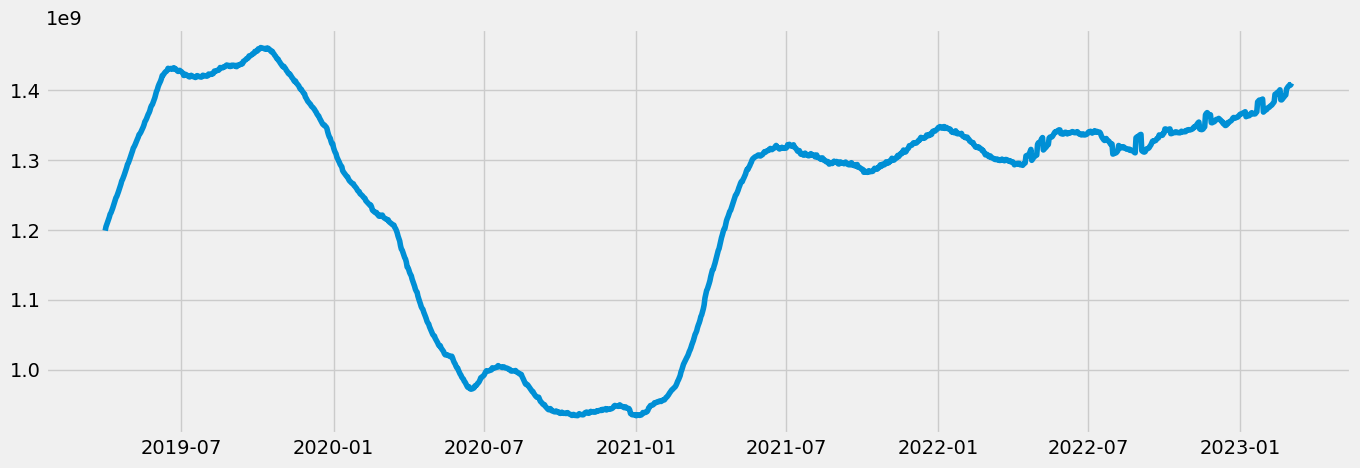

In [17]:
# Plot the data using matplotlib.

plt.figure(figsize=(15,5), dpi=100)

plt.plot(df_nat_trip_avg)

In [18]:
# Check for missing values

df_nat_trip_avg.isnull().sum() 

trip_quarterly_avg    0
dtype: int64

In [19]:
# Check for duplicates

dups = df_nat_trip_avg.duplicated()
dups.sum()

0

## 3. Time-series analysis: decomposition

In [20]:
# Decompose the time series using an multiplicative model

decomposition = sm.tsa.seasonal_decompose(df_nat_trip_avg, model='additive',period=90)

In [21]:
from pylab import rcParams

rcParams['figure.figsize'] = 18, 7

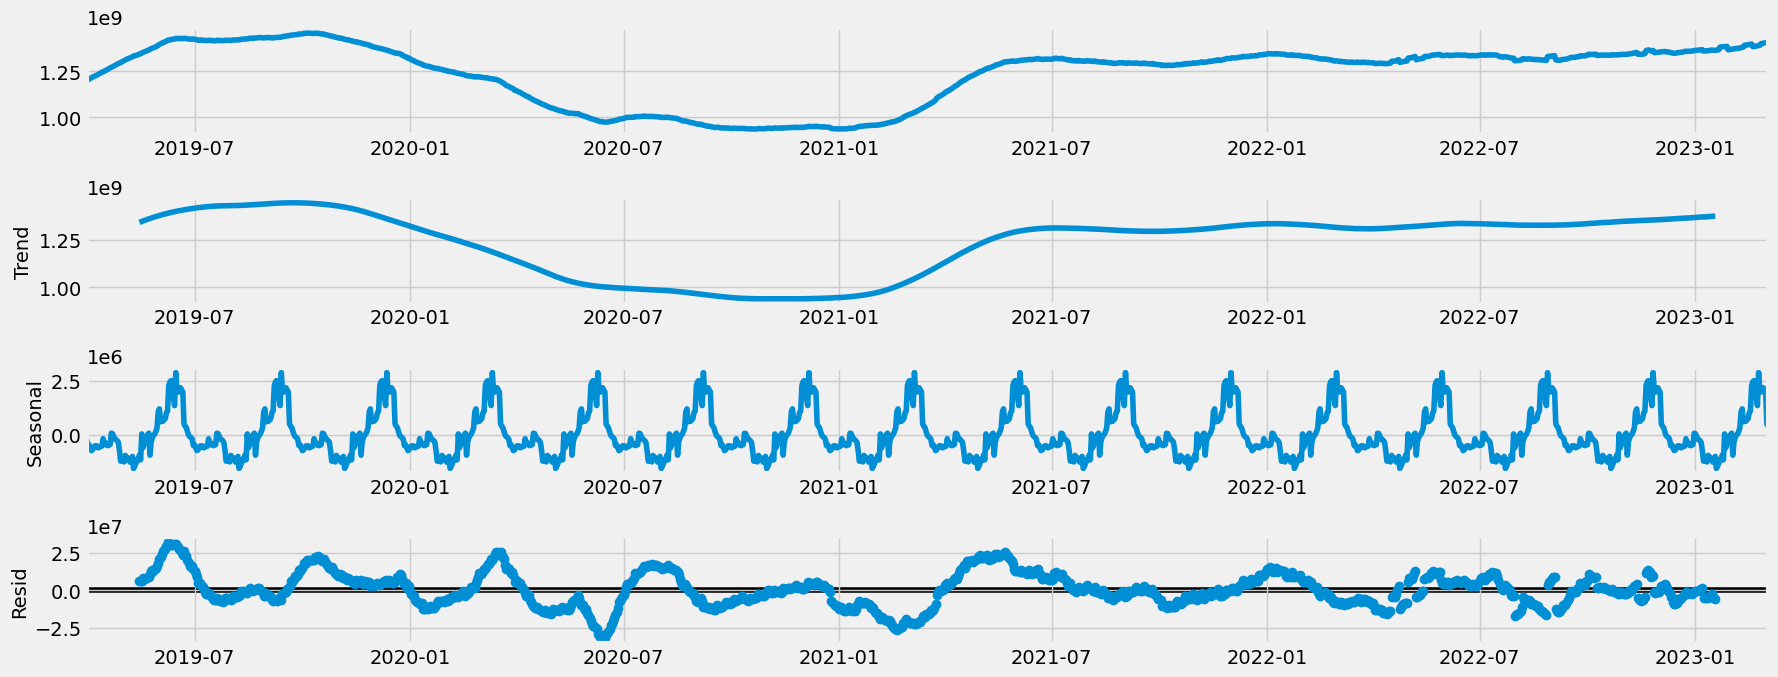

In [22]:
# Plot the separate components

decomposition.plot()
plt.show()

##### Comparison of the level to the trend shows the 90 day average appropriately smoothed the data. Seasonal flunctions are present. There is still a lot of flucuation in the residual chart, but this could be in part to the impact of the pandemic.

## 4. Testing for stationarity

In [23]:
from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): 
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(df_nat_trip_avg['trip_quarterly_avg'])

Dickey-Fuller Stationarity test:
Test Statistic                   -2.175617
p-value                           0.215214
Number of Lags Used              23.000000
Number of Observations Used    1411.000000
Critical Value (1%)              -3.434993
Critical Value (5%)              -2.863591
Critical Value (10%)             -2.567862
dtype: float64


##### End result shows the Test Statistic is higher than the critical value significance score. This proves the data is non-stationary, containing a trend, because there is a confirmed unit root in the data.

## 5. Stationarizing the Department of Transportion Trip Distance data

In [24]:
data_diff = df_nat_trip_avg - df_nat_trip_avg.shift(1)

In [25]:
data_diff.dropna(inplace = True)

In [26]:
data_diff.head()

,trip_quarterly_avg
datetime,
2019-04-01,5.777909e+06
2019-04-02,3.147014e+06
2019-04-03,3.548946e+06
2019-04-04,3.495233e+06
2019-04-05,3.355531e+06


In [27]:
data_diff.columns

Index(['trip_quarterly_avg'], dtype='object')

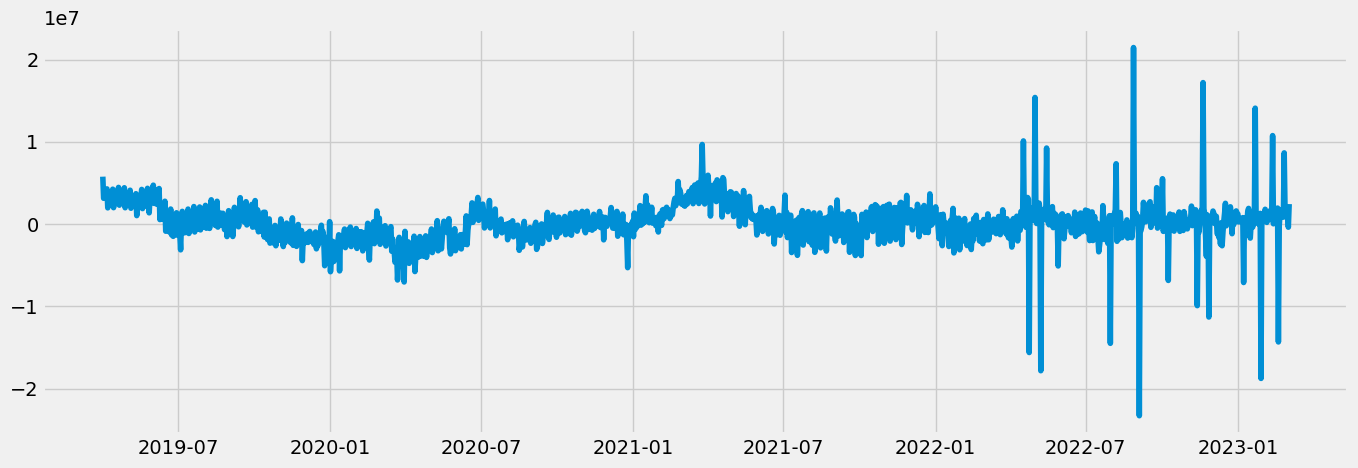

In [28]:
# Reviewing impact of differencing the data

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

In [29]:
dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:
Test Statistic                   -3.176267
p-value                           0.021400
Number of Lags Used              23.000000
Number of Observations Used    1410.000000
Critical Value (1%)              -3.434996
Critical Value (5%)              -2.863592
Critical Value (10%)             -2.567862
dtype: float64


#### Test Statistic now displays a value less than the 5% critical value and the p-value is less than 0.05

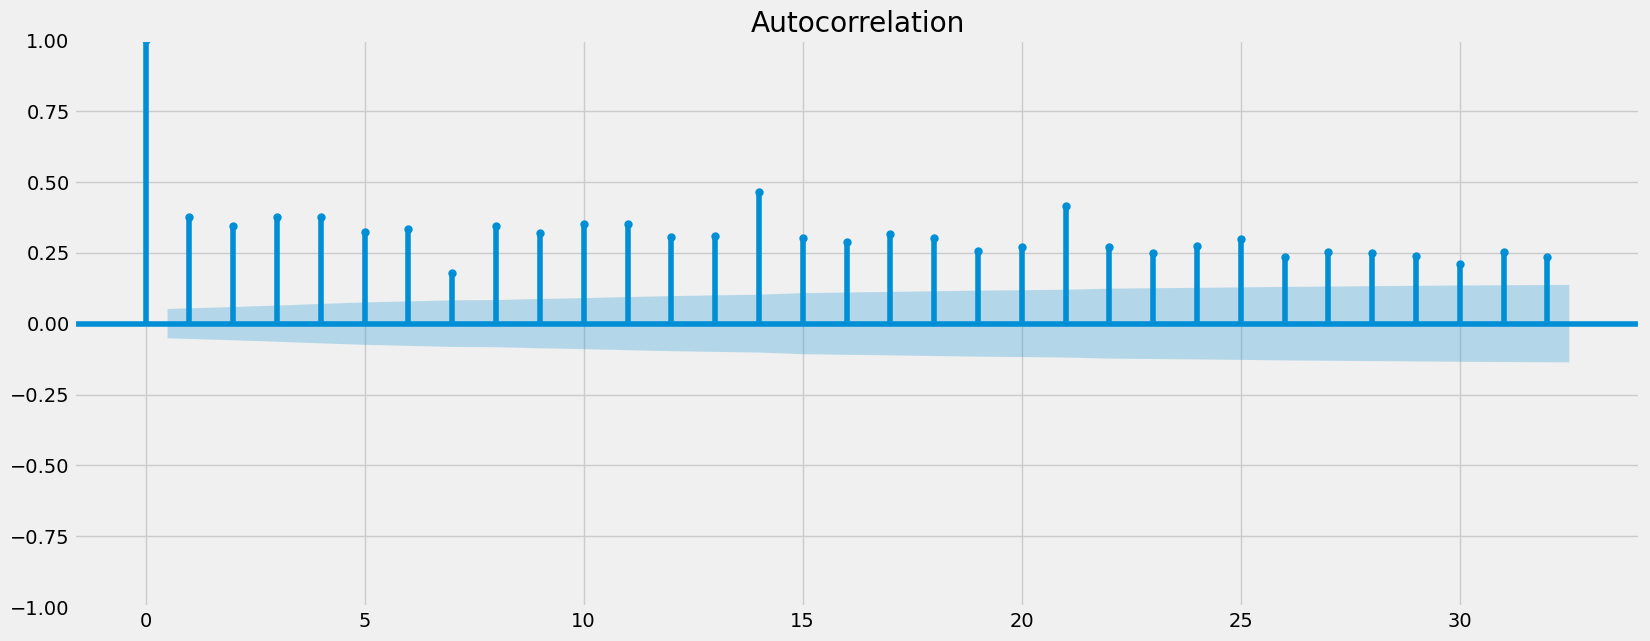

In [30]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(data_diff)
plt.show()

#### The autocorrelation plot still returned all values above the confiderence interval indicating a very significant correlation still exists despite the stationary testing returned acceptable values.

In [31]:
# Running another round of differencing to address correlation

data_diff2 = data_diff - data_diff.shift(1)

In [32]:
data_diff2.dropna(inplace = True) 

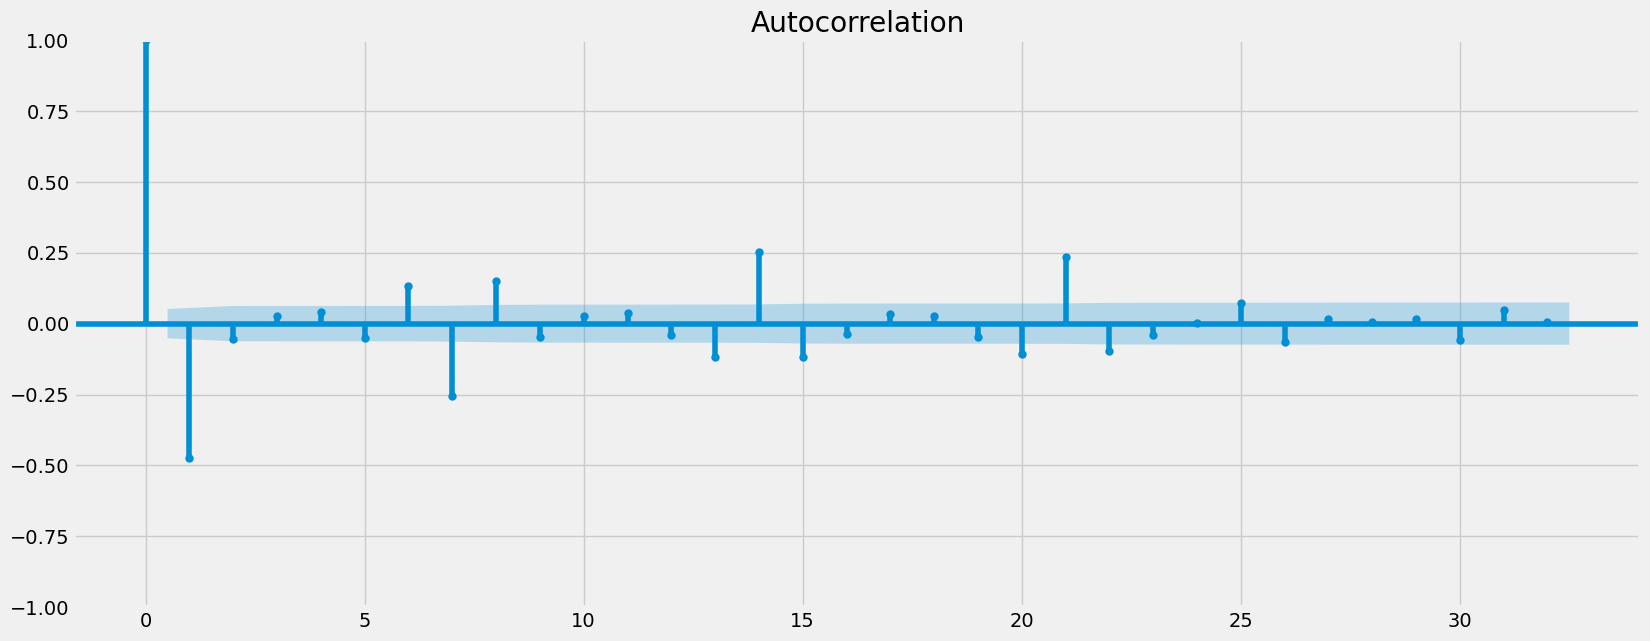

In [33]:
plot_acf(data_diff2)
plt.show()

#### The autocorrelation has been effectively broken by the second round of differencing. 